## Trabajo Práctico 4 - Estimación de parámetros

---

Simular una muestra de dos variables aleatorias $X_1$ y $X_2$ que siguen una distribución normal estándar. Calcular la varianza muestral $s^2$. Considerar dos estimadores diferentes de la desviación estándar $t_1 = \sqrt{s^2}$ y $t_2 = \sqrt{\pi s^2/2}$. Repetir la simulación 1000 veces y construir los histogramas de frecuencia de $t_1$ y $t_2$. Decidir si los estimadores $t_1$ y $t_2$ son sesgados o no. Discutir porque el estimador de varianza $s^2$ no tiene sesgo pero el estimador de la desviación estándar $t_1 = \sqrt(s^2)$ es sesgado.


In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Número de simulaciones
num_simulations = 1000

# Simular muestras de dos variables aleatorias normales estándar
samples = np.random.normal(0, 1, (2, num_simulations))

# Calcular la varianza muestral s^2 para cada muestra
s2 = np.var(samples, axis=0, ddof=1)

# Calcular los estimadores t1 y t2
t1 = np.sqrt(s2)
t2 = np.sqrt(np.pi * s2 / 2)

In [46]:
sesgo_s2 = np.mean(s2) - 1
print(f'Sesgo de s2: {sesgo_s2:.3f}')

Sesgo de s2: 0.010


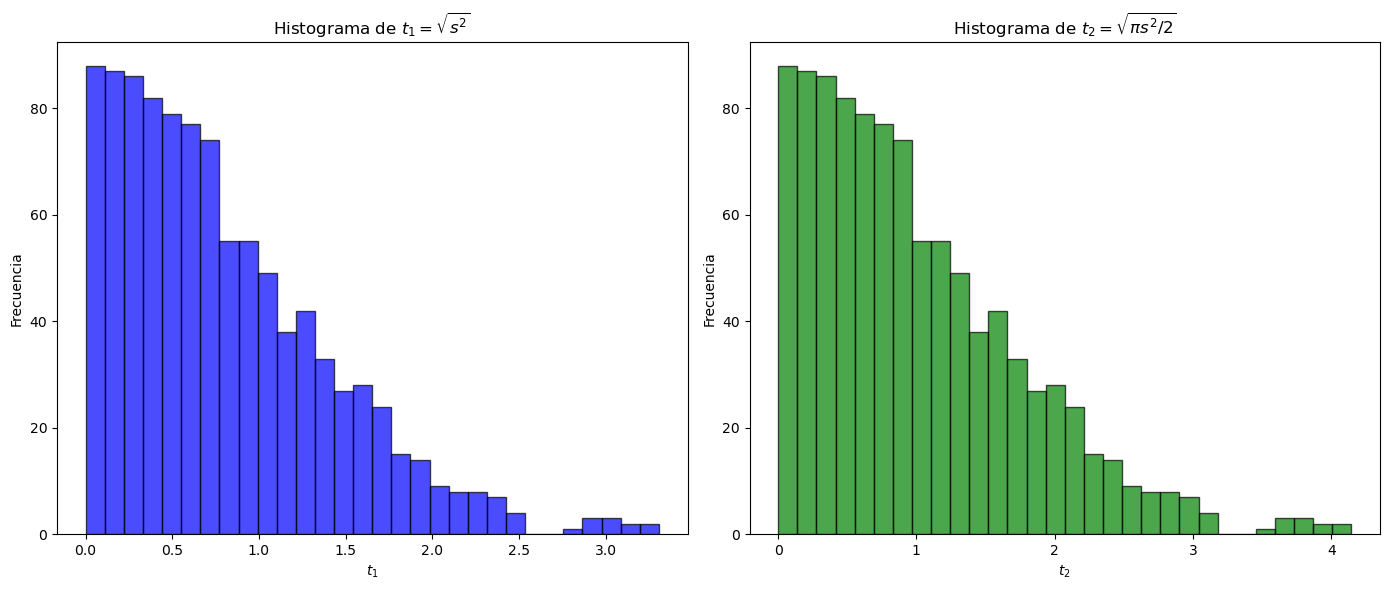

In [47]:
# Construir los histogramas de frecuencia de t1 y t2

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(t1, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histograma de $t_1 = \\sqrt{s^2}$')
plt.xlabel('$t_1$')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(t2, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Histograma de $t_2 = \\sqrt{\\pi s^2 / 2}$')
plt.xlabel('$t_2$')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [49]:
# Calcular las medias de los estimadores para discutir el sesgo

mean_t1 = np.mean(t1)
mean_t2 = np.mean(t2)

print(f'Media de t1: {mean_t1:.3f}')
print(f'Media de t2: {mean_t2:.3f}')

Media de t1: 0.798
Media de t2: 1.000


In [50]:
# Discutir el sesgo

sesgo_1 = mean_t1 - 1
sesgo_2 = mean_t2 - 1

print(f'Sesgo de t1: {sesgo_1:.3f}')
print(f'Sesgo de t2: {sesgo_2:.3f}')

Sesgo de t1: -0.202
Sesgo de t2: -0.000


Aunque $s^2$ es un estimador sin sesgo de la varianza, esto no significa que $s$ sea un estimador sin sesgo de la desviación estándar $\sigma$. Esto se debe a que la media de la raíz cuadrada no es igual a la raíz cuadrada de la media:


$\mathbb{E}[\sqrt{s^2}] \neq \sqrt{\mathbb{E}[s^2]}.$

De hecho, el valor esperado de $s$, tiende a ser menor que $\sigma$, lo que implica que $s$ es un estimador sesgado de $\sigma$.

El sesgo surge debido a la no linealidad de la función raíz cuadrada.